In [80]:
import csv
from watson_developer_cloud import ToneAnalyzerV3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json

<h1> MuleSoft API call </h1>

In [115]:

url = "http://cts-digital-ipm.cloudhub.io/api/v1/salesforce/ticket/"

headers = {
    'client_id': "bfb6df74a3f4486db9dbd51bf5764f90",
    'client_secret': "aeAbCaD530504f07B2F8d50c7EA9EAC9",
    'cache-control': "no-cache",
    'postman-token': "334d9a99-c2fc-4324-61d3-4a2c8a1e1dd4"
    }

response = requests.request("GET", url, headers=headers)

texted =json.loads(response.text)
#print(response.text)
url = "http://cts-digital-ipm.cloudhub.io/api/v1/salesforce/ticket/"+texted[0].get('ticketNumber')

headers = {
    'client_id': "bfb6df74a3f4486db9dbd51bf5764f90",
    'client_secret': "aeAbCaD530504f07B2F8d50c7EA9EAC9",
    'cache-control': "no-cache",
    'postman-token': "334d9a99-c2fc-4324-61d3-4a2c8a1e1dd4"
    }

response = requests.request("GET", url, headers=headers)

texted =json.loads(response.text)
print(response.text)

[
  {
    "ticketName": "tic_tac_toe",
    "ticketDesc": "no music right now",
    "status": "In Progress",
    "ticketNumber": "a017F00000XNqJQQA1"
  }
]


In [82]:
# extreacting the text from the api 
texted=texted[0].get('ticketDesc')
texted

'New prospect has entered at Thu Apr 26 2018 12:08:32 GMT+0530 (India Standard Time)'

In [111]:
texted = "Shut up! I don't want to talk about it !"

<h1> IBM Watson, Tone Analyzer API call </h1>

In [112]:
tone_analyzer = ToneAnalyzerV3(
    username='',  # Enter the username and password provided by bluemix
    password='',
    version='2016-05-19 ')
content_type = 'application/json'
result = tone_analyzer.tone({"text": texted},content_type)  # Getting output as a file of dictionary
xyz = []

for x in result["document_tone"]["tone_categories"][0].get("tones"):  # Selecting specific Emotion is result
    xyz.append(x)





<h3> Raw Result</h3>

In [113]:
result

{'document_tone': {'tone_categories': [{'category_id': 'emotion_tone',
    'category_name': 'Emotion Tone',
    'tones': [{'score': 0.691402, 'tone_id': 'anger', 'tone_name': 'Anger'},
     {'score': 0.075383, 'tone_id': 'disgust', 'tone_name': 'Disgust'},
     {'score': 0.140951, 'tone_id': 'fear', 'tone_name': 'Fear'},
     {'score': 0.039117, 'tone_id': 'joy', 'tone_name': 'Joy'},
     {'score': 0.198978, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]},
   {'category_id': 'language_tone',
    'category_name': 'Language Tone',
    'tones': [{'score': 0.0,
      'tone_id': 'analytical',
      'tone_name': 'Analytical'},
     {'score': 0.0, 'tone_id': 'confident', 'tone_name': 'Confident'},
     {'score': 0.920133, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]},
   {'category_id': 'social_tone',
    'category_name': 'Social Tone',
    'tones': [{'score': 0.039646,
      'tone_id': 'openness_big5',
      'tone_name': 'Openness'},
     {'score': 0.122518,
      'tone_id': 'conscient

In [86]:
yo=result['document_tone']['tone_categories'][0].get('tones')

In [87]:
from textblob import TextBlob

blob = TextBlob(texted)
blob.polarity

0.06818181818181818

<h3> Creating and handling the Database</h3>

In [88]:
# don't} run it again
df = pd.DataFrame(columns =['score','tone_id','tone_name','polarity'])

In [89]:
for i in range(5):
    df = df.append(yo[i], ignore_index=True)
#else:
#    

In [90]:
df.loc[3:4,'polarity']=-0.8

In [91]:
df

,score,tone_id,tone_name,polarity
0,0.026566,anger,Anger,NaN
1,0.020560,disgust,Disgust,NaN
2,0.033922,fear,Fear,NaN
3,0.283470,joy,Joy,-0.8
4,0.180420,sadness,Sadness,-0.8


In [92]:
df.to_csv('output.csv')

<h3> Visualization of The Emotions</h3>

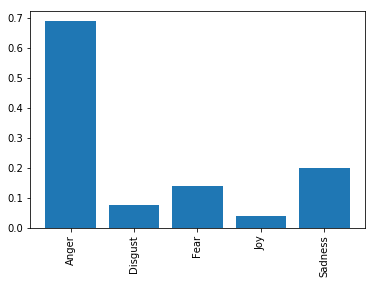

In [114]:
# Taking emotions to visulisation creating array and plotting it using matplotlib
emotion = []
values = []
X = [1, 2, 3, 4, 5]
scale = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

for x in xyz:
    emotion.append(x.get("tone_name"))
    values.append(x.get("score"))

plt.bar(X, values)  # Plot value
plt.xticks(X, emotion, rotation='vertical')
plt.show()


<h2> Facial emoitons recognition </h1>

In [94]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types


In [116]:
# Instantiates a client
client = vision.ImageAnnotatorClient()


In [117]:
file_name = os.path.join(
    os.path.dirname('/home/sahil/Desktop/cognizant'),
    '/home/sahil/Desktop/cognizant/z.jpg')

In [118]:
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

In [119]:
image = types.Image(content=content)

In [120]:
response = client.label_detection(image=image)
labels = response.label_annotations

In [121]:

print('Labels:')
for label in labels:
    print(label)

Labels:
mid: "/m/01qkbx"
description: "professional"
score: 0.6779342293739319
topicality: 0.6779342293739319

mid: "/m/01jwgf"
description: "product"
score: 0.6071074604988098
topicality: 0.6071074604988098

mid: "/m/0ds99lh"
description: "fun"
score: 0.530925452709198
topicality: 0.530925452709198

mid: "/m/09x_r"
description: "entrepreneur"
score: 0.5214413404464722
topicality: 0.5214413404464722



In [122]:
def detect_faces(path):
    """Detects faces in an image."""
    client = vision.ImageAnnotatorClient()

In [123]:
with io.open('/home/sahil/Desktop/cognizant/z.jpg', 'rb') as image_file:
        content = image_file.read()

In [124]:
response = client.face_detection(image=image)
faces = response.face_annotations

In [125]:
likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')

In [126]:
for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))

anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (364,85),(726,85),(726,505),(364,505)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
face bounds: (201,302),(335,302),(335,458),(201,458)
anger: VERY_UNLIKELY
joy: UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (1099,451),(1214,451),(1214,585),(1099,585)
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY
face bounds: (943,386),(1074,386),(1074,539),(943,539)
